<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lezione-1---Homeworks" data-toc-modified-id="Lezione-1---Homeworks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lezione 1 - Homeworks</a></span><ul class="toc-item"><li><span><a href="#Letture" data-toc-modified-id="Letture-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Letture</a></span></li><li><span><a href="#Una-variante-di-k-NN:--RadiusNeighbors-(RN)" data-toc-modified-id="Una-variante-di-k-NN:--RadiusNeighbors-(RN)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Una variante di k-NN:  RadiusNeighbors (RN)</a></span><ul class="toc-item"><li><span><a href="#Domanda-1" data-toc-modified-id="Domanda-1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Domanda 1</a></span></li><li><span><a href="#Domanda-2" data-toc-modified-id="Domanda-2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Domanda 2</a></span></li><li><span><a href="#Esercizio-1" data-toc-modified-id="Esercizio-1-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Esercizio 1</a></span></li></ul></li></ul></li><li><span><a href="#Soluzioni" data-toc-modified-id="Soluzioni-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soluzioni</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Domanda-1" data-toc-modified-id="Domanda-1-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Domanda 1</a></span></li><li><span><a href="#Domanda-2" data-toc-modified-id="Domanda-2-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Domanda 2</a></span></li><li><span><a href="#Esercizio-1" data-toc-modified-id="Esercizio-1-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Esercizio 1</a></span></li></ul></li></ul></li></ul></div>

# Lezione 1 - Homeworks

## Letture

- [guida di KNN su sklearn](https://scikit-learn.org/stable/modules/neighbors.html#classification) 
**per chi è arrugginito con la matematica**:
- [vettori](https://en.wikipedia.org/wiki/Cartesian_coordinate_system)
- [distanza euclidea](https://en.wikipedia.org/wiki/Euclidean_distance)
- [media](https://simple.wikipedia.org/wiki/Mean)
- [deviazione standard](https://simple.wikipedia.org/wiki/Standard_deviation)

## Una variante di k-NN:  RadiusNeighbors (RN)

Invece di calcolare per ogni punto di test i k esempi del train più vicini possiamo usare come vicinato **tutti i punti** che sono a una determinata **distanza r** dal punto.  


<figure>
<img src="1_data/frnns.svg" alt="Radius neighbors" style="width: 400px;"/>
    <figcaption>Figura 1: Il vicinato (in arancione) per un punto di test (nero). In 2D un vicinato calcolato con la distanza euclidea è una "palla".</figcaption>
</figure>

I vicini **non** sono più un **numero fissato** come in k-NN ma dipendono dalla **densità** intorno al punto di test.

<figure>
<img src="1_data/frnns2.svg" alt="Radius neighbors" style="width: 400px;"/>
    <figcaption>Figura 2: Due vicinati (con lo stesso valore di r) con numero di vicini diversi.</figcaption>
</figure>

### Domanda 1
Data una distanza **r**, esiste un valore di **k** per cui tutti i possibili vicinati di **k-NN** coincidono con i vicinati di **RN**? Se sì quale?


### Domanda 2
Quando può essere conveniente usare **RadiusNeighbors** invece di **KNN**?


### Esercizio 1
- implementare Radius Neighbors
- plottare l'accuratezza di train e test al variare di k per RadiusNeighbors

Suggerimento: che parti di KNN devo modificare?


# Soluzioni

### Domanda 1
No, in generale non esiste un valore di **k** per cui i tutti i vicinati di RN corrispondono a quelli di KNN.

###  Domanda 2
Quando i punti (esempi del dataset) non sono distribuiti in modo omogeneo nello spazio.

### Esercizio 1 
Di seguito una implementazione di RN con pesatura e senza (parametro weighted)

In [1]:
import numpy as np

def rn_predict_single(x_new, radius, X_train, y_train, weighted):
    # weighted è un parametro boolean che mi dice se fare la versione weighted o no

    distances = []
    for x_tr_i in X_train:

        d = np.sqrt(np.sum((x_new-x_tr_i)**2))
        distances.append(d)
        
    # converto la lista in numpy array. Mi serve dopo per fare operazioni di indicizzazione
    # di numpy
    distances = np.array(distances)
    
    # questo era quello che facevamo con knn
    # k_neighbors = np.argsort(distances)[:k]
    # NB: k_neighbors è una maschera di indici (interi)
    
    # questa è una maschera binaria che indica quali punti stanno dentro 
    # una palla di raggio 'radius'
    #inside_ball = distances <= radius
    inside_ball = distances < radius
    
    # caso degenere in cui il vicinato è vuoto. Rispondo 0 per convenzione.
    if np.sum(inside_ball) == 0: 
        y_new_pred = 0
    else:
        if weighted:
            # calcolo i pesi in modo inversamente proporzionale alla distanza
            w = 1./ distances[inside_ball]
            
            # uso bincount (passando il parametro weights) 
            # per votare a maggioranza con sistema pesato
            occurrences = np.bincount(y_train[inside_ball], minlength=3, weights=w)
        else:
            occurrences = np.bincount(y_train[inside_ball], minlength=3)
        y_new_pred = np.argmax(occurrences)
        
    return y_new_pred


def rn_predict(X_new, radius, X_train, y_train, weighted):
    
    y_pred_test = []
    for x_test_i in X_new:
    # for i in range(len(X_test)):
    #     x_test_i = X_test[i]
        y_pred_test_i = rn_predict_single(x_test_i, radius, X_train, y_train, weighted)
        y_pred_test += [y_pred_test_i]
    return np.array(y_pred_test)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


X_train = np.random.random_sample([200, 2])

def gen_y(x):
    if x[0] < 0.5 and x[1] < 0.5:
        y = 0
    elif x[0] > 0.5 and x[1] > 0.5:
        y = 0
    else:
        y = 1
    return y

In [3]:
# creo y train

y_train = np.array([gen_y(x) for x in X_train])

In [4]:
# creo nuovi dati

X_new = np.random.random_sample([20, 2])
y_new = np.array([gen_y(x) for x in X_new])

In [5]:
# raggio per l'algoritmo

radius = 0.05

In [6]:
def get_color(integer):
    
    if integer == 0:
        color = "blue"
    else:
        color = "yellow"
    return color

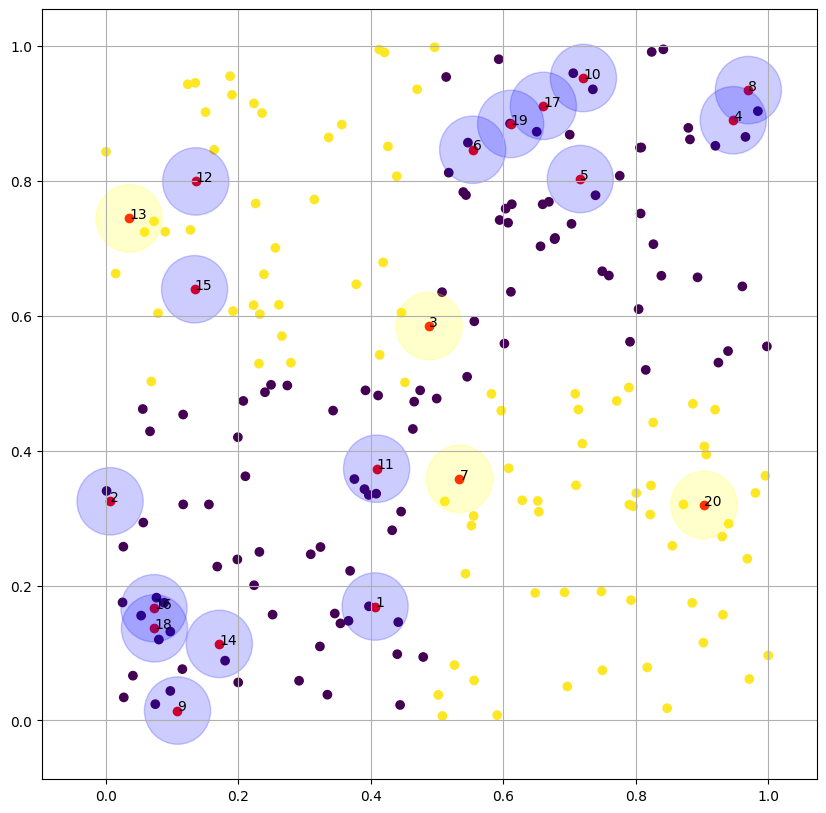

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(X_train[:,0], X_train[:,1], c = y_train)

ax.scatter(X_new[:,0], X_new[:,1], c = "red")

pred = rn_predict(X_new, radius, X_train, y_train, False)

for i, new in enumerate(X_new):
    cir = plt.Circle(new, radius, color=get_color(pred[i]), fill=True, alpha=0.2)
    ax.annotate(str(i+1), new)
    ax.add_patch(cir)

ax.grid()

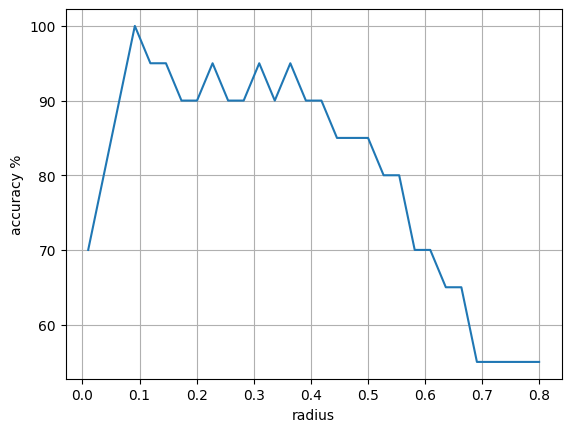

In [8]:
# grafico dell'accuracy al variare del raggio

accuracy = []
radius_list = np.linspace(0.01, 0.8, 30)

for radius in radius_list:
    pred = rn_predict(X_new, radius, X_train, y_train, False)
    correct_pred = (pred == y_new).sum()
    correct_pred_perc = correct_pred/len(pred)
    accuracy.append(correct_pred_perc*100)
    
plt.plot(radius_list, accuracy)
plt.grid()
plt.xlabel("radius")
plt.ylabel("accuracy %")
plt.show()